# Machine Learning with Linear Regression 

In this project, we will work with the Student Performance data set, indicating the final grade of a student.

We will create a linear regression model that will predict the final grade of the student, based on his/her features. As this is a regression problem, a linear regression model is well suited here.

In [17]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline

## Data

The data set contains the following features:

- "school": student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- "sex": student's sex (binary: 'F' - female or 'M' - male)
- "age": student's age (numeric: from 15 to 22)
- "address": student's home address type (binary: 'U' - urban or 'R' - rural)
- "famsize": family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- "Pstatus": parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- "Medu": mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- "Fedu": father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- "Mjob": mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or - police), 'at_home' or 'other')
- "Fjob": father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- "reason": reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- "guardian": student's guardian (nominal: 'mother', 'father' or 'other')
- "traveltime": home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- "schoolsup": extra educational support (binary: yes or no)
- "famsup": family educational support (binary: yes or no)
- "studytime": weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- "failures": number of past class failures (numeric: n if 1<=n<3, else 4)
- "absences": number of school absences (numeric: from 0 to 93)
- "paid": extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- "activities": extra-curricular activities (binary: yes or no)
- "nursery": attended nursery school (binary: yes or no)
- "higher": wants to take higher education (binary: yes or no)
- "internet": Internet access at home (binary: yes or no)
- "romantic": with a romantic relationship (binary: yes or no)
- "famrel": quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- "freetime": free time after school (numeric: from 1 - very low to 5 - very high)
- "goout": going out with friends (numeric: from 1 - very low to 5 - very high)
- "Dalc": workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- "Walc": weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- "health": current health status (numeric: from 1 - very bad to 5 - very good) 
- "G1": first period grade (numeric: from 0 to 20) 
- "G2": second period grade (numeric: from 0 to 20) 
- "G3": final grade (numeric: from 0 to 20, output target)

but for this mini-project, we'll only use the most relevant:

- "G1",
- "G2",
- "studytime",
- "failures",
- "absences",
- "G3"

In [18]:
data = pd.read_csv("../data/student-mat.csv", sep=";")
data = data[["G1", "G2", "studytime", "failures", "absences", "G3"]]

In [19]:
data.head()

G1  G2  studytime  failures  absences  G3
0   5   6          2         0         6   6
1   5   5          2         0         4   6
2   7   8          2         3        10  10
3  15  14          3         0         2  15
4   6  10          2         0         4  10

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
G1           395 non-null int64
G2           395 non-null int64
studytime    395 non-null int64
failures     395 non-null int64
absences     395 non-null int64
G3           395 non-null int64
dtypes: int64(6)
memory usage: 18.6 KB


In [21]:
data.describe()

G1          G2   studytime    failures    absences          G3
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000
mean    10.908861   10.713924    2.035443    0.334177    5.708861   10.415190
std      3.319195    3.761505    0.839240    0.743651    8.003096    4.581443
min      3.000000    0.000000    1.000000    0.000000    0.000000    0.000000
25%      8.000000    9.000000    1.000000    0.000000    0.000000    8.000000
50%     11.000000   11.000000    2.000000    0.000000    4.000000   11.000000
75%     13.000000   13.000000    2.000000    0.000000    8.000000   14.000000
max     19.000000   19.000000    4.000000    3.000000   75.000000   20.000000

## Explanatory Analysis

Checking out the distribution of time studying.

<module 'matplotlib.pyplot' from 'D:\\Users\\redad\\miniconda3\\envs\\artificial_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

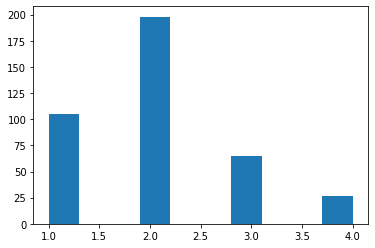

In [22]:
plt.hist(data["studytime"])
plt

Checking out the relationship between time studying and the first grades.

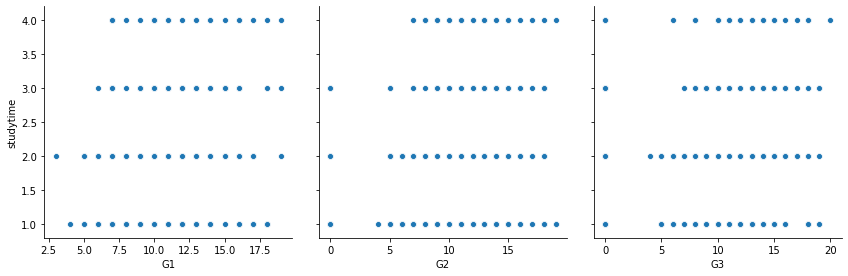

In [23]:
sns.pairplot(data, x_vars=['G1', 'G2', 'G3'], y_vars=['studytime'], height=4)

Finally, a pairplot to visualize everything else.

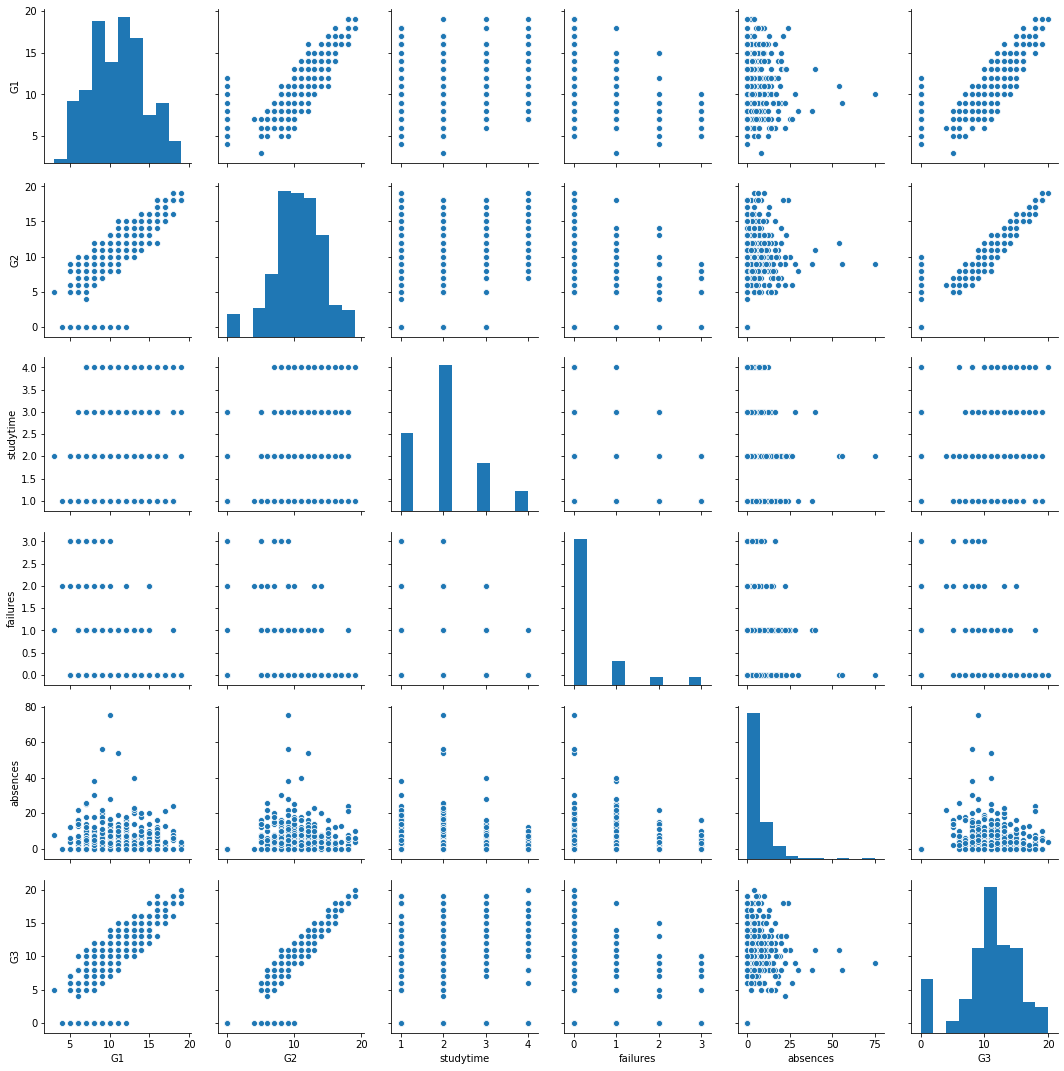

In [24]:
sns.pairplot(data)

## Model Building

We'll split the features (X) and the labels (y).
We want to predict the label, based on the features.

In [25]:
# The column "G3" has all the final grade. This is our labels column.
X = data.drop(["G3"], axis=1)
y = data["G3"]

We give to our test set, 10% of all the data.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

For this mini-project, we'll use the Linear Regression Algorithm.

In [27]:
model = linear_model.LinearRegression()

We fit the training data to the model, he will learn from it.

In [28]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We train multiple times the model to get the best score.

In [29]:
best = 0
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    model = linear_model.LinearRegression()

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentfinalgrades.pickle", "wb") as f:
            pickle.dump(model, f)

Accuracy: 0.892045834670201
Accuracy: 0.934511939628521
Accuracy: 0.9041988039677844
Accuracy: 0.7252649246233629
Accuracy: 0.8247999094104039
Accuracy: 0.744014091265873
Accuracy: 0.6277373515328081
Accuracy: 0.827031515682822
Accuracy: 0.7373372025988526
Accuracy: 0.7267788594223027
Accuracy: 0.7117607422931946
Accuracy: 0.8768430069485712
Accuracy: 0.8519277687753922
Accuracy: 0.7324277907210863
Accuracy: 0.7199357662219482
Accuracy: 0.8851285924539657
Accuracy: 0.7471066815047278
Accuracy: 0.8254086552958835
Accuracy: 0.8130803014022339
Accuracy: 0.7752946496709334


## Predictions and Evaluations

We load our best model, and see how it will perform on the test set.

In [30]:
pickler = open("studentfinalgrades.pickle", "rb")
best_model = pickle.load(pickler)
print("Best score:", round(best_model.score(X_test, y_test), 3))

Best score: 0.784


In case, you want to see how well he performed on the first 5 students of the test set.

In [31]:
predictions = best_model.predict(X_test)

for i in range(len(predictions[:5])):
    print("Features:", list(X_test.iloc[i, :]))
    print("Label:", y_test.iloc[i])
    print("Prediction:", round(predictions[i], 2))
    print("----------")

Features: [11, 11, 2, 0, 0]
Label: 10
Prediction: 10.57
----------
Features: [19, 19, 4, 0, 4]
Label: 20
Prediction: 19.34
----------
Features: [8, 8, 1, 1, 4]
Label: 8
Prediction: 7.23
----------
Features: [8, 6, 2, 0, 18]
Label: 7
Prediction: 5.88
----------
Features: [6, 7, 2, 0, 0]
Label: 0
Prediction: 5.89
----------


Let's evaluate our best model. We'll use RMSE (closer to 0, better the model is) and R² (closer to 1, better the model is).

In [33]:
rmse = mean_squared_error(y_test, predictions)
print("RMSE of our model:", rmse)

r2 = r2_score(y_test, predictions)
print("R² of our model:", r2)

RMSE of our model: 5.775253686005096
R² of our model: 0.7843243885349606
